<div style="font-weight: bold; color:#5D8AA8" align="center">
    <div style="font-size: xx-large">Computación Numérica</div><br>
    <div style="font-size: x-large; color:gray">Práctica 1</div><br>
    <div style="font-size: large">María Barroso - Gloria del Valle</div><br></div><hr>
</div>

**Configuración inicial**

In [41]:
%%html
<style>
    .qst {background-color: #b1cee3; padding:10px; border-radius: 5px; border: solid 2px #5D8AA8;}
    .qst:before {font-weight: bold; content:""; display: block; margin: 0px 10px 10px 10px;}
    h1, h2, h3 {color: #5D8AA8;}
    .text_cell_render p {text-align: justify; text-justify: inter-word;}
</style>

In [42]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Importamos los paquetes utilizados

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import sys

# Apartado 1. Errores

## Cuestiones teóricas

<div class="qst">
Dado que el redondeo en base 10 de la suma o producto de dos números es ∓0,5 ∗ $\epsilon$, donde $\epsilon$ es el valor la última cifra significativa y que el dígito eliminado es aleatorio ¿podemos suponer que el redondeo es una variable aleatoria uniforme?
</div>

Podemos suponer que el redondeo es una variable aleatoria uniforme ya que el dígito eliminado es aleatorio.

<div class="qst">
Si dibujo la gráfica de función de densidad del error por redondeo ¿Como debería ser dicha gráfica?
</div>

La gráfica debería ser una nube de puntos alrededor de $\{y=0\}$ ya que el error puede ser por exceso y por defecto.

<div class="qst">
    Si asumimos que el error de redondeo es una variable aleatoria uniforme entre −0,5 ∗ $\epsilon$ y +0,5 ∗ $\epsilon$ ¿Cuál debería ser error absoluto promedio de la suma (o el producto) de un número elevado de números en coma flotante?, da una respuesta razonada.
</div>


El error absoluto de la suma de dos números y el error absoluto del producto de dos números coincide y es igual a la suma de los errores absolutos de cada operando. Por otro lado, la esperanza de la suma de errores absolutos es igual a la suma de las esperanzas de cada error absoluto. Como el error absoluto esperado es igual a 0, concluimos que el error absoluto promedio buscado es igual a 0. 



##  Ejercicio 1

Definimos una función que represente para cada $i$, cada valor $y_i=f(x_i)$.

In [44]:
def plot_ejercicio_1(i,y,xlim,ylim):
    plt.plot(i,y,'b.')
    plt.ylim(xlim,ylim)
    plt.xlabel('x', fontsize=12)
    plt.ylabel('f(x)', fontsize=12)
    plt.show()

### Apartado a)

En este apartado se evalúa la función $f(x) = \frac{4x^4-59x^3+324x^2-751x+622}{x^4 - 14x^3 + 72x^2 - 151x +112}$ para $x=1.606 + 2^{-52}i$ con $i=\{0,1,...800\}$.

*Observación:* los valores $x$ utilizados para evaluar la función son valores cercanos a $x\approx1.606$ ya que el incremento utlizado $2^{-56}$ es el valor épsilon de nuestra máquina.

In [45]:
print('Incremento:',2**-52)
print('Épsilon:', sys.float_info.epsilon)

Incremento: 2.220446049250313e-16
Épsilon: 2.220446049250313e-16


In [46]:
i = range(801)
X = [1.606 + r*2**(-52) for r in i]

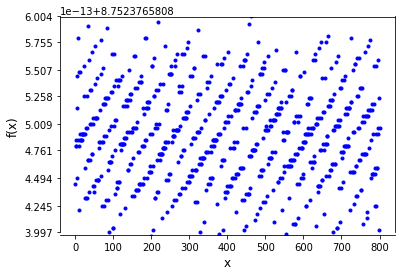

In [47]:
f_a = lambda x: (4*x**4-59*x**3+324*x**2-751*x+622)/(x**4-14*x**3+72*x**2-151*x+112)
y_a = [f_a(x) for x in X]

plot_ejercicio_1(i,y_a,8.7523765807784,8.7523765807786)

<div class="qst">
¿Sale una figura continua? ¿Por qué? ¿Puedes explicar el patrón que sale? ¿Qué
consecuencias puedes sacar sobre el redondeo?
</div>


A pesar de que debería salir una figura continua ya que la función es continua (el denominador no se anula en ningún punto), la figura que se muestra no es continua sino que tiene saltos discretos. Esto nos lleva a pensar que la distribución empírica del error por redondeo no es uniforme y parece que los errores se van acumulando generando grandes variaciones respecto al valor real de la función.

### Apartado b)

En este apartado se evalúa la función $f(x) = \frac{622 + x(-751 + x(324 +x(-59 +4x)))}{112 + x(-151 + x(72 + x(-14 + x)))}$ para los mismos valores de $x$ del apartado anterior.


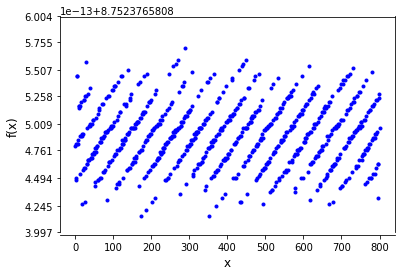

In [48]:
f_b = lambda x : (622 + x * (-751 + x * (324 + x * (-59 + 4 * x))))/(112 + x * (-151 + x * (72 + x * (-14 + x))))
y_b = [f_b(x) for x in X]

plot_ejercicio_1(i,y_b,8.7523765807784,8.7523765807786)

<div class="qst">
    
¿Observas alguna diferencia con la gráfica anterior?
    
</div>

En este caso el patrón es el mismo pero la varianza de la distribución del error por redondeo es menor. Esto se debe a que en esta función se realizan menos operaciones y por tanto, se acumula menos error de redondeo.

### Apartado c)

En este apartado se evalúa la función $f(x) = 4- \frac{3(x-2)[(x-5)^2 + 4]}{x + (x - 2)^2  [(x-5)^2 + 3]}$ para los mismo valores de $x$.

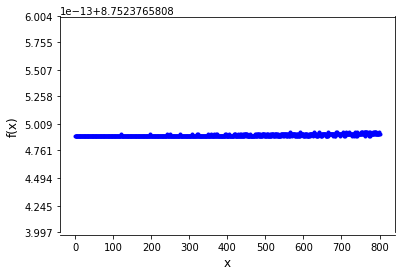

In [49]:
f_c = lambda x: 4 - (3*(x-2)*((x-5)**2 + 4))/(x + (x - 2)**2 * ((x-5)**2 + 3))
y_c = [f_c(x) for x in X]

plot_ejercicio_1(i,y_c,8.7523765807784,8.7523765807786)

<div class="qst">
¿Observas alguna diferencia con las gráficas anteriores?    
</div>

En este caso la varianza es aún menor. Los valores de la función se acumulan aproximadamente en una recta y ya no se aprecian las bandas diagonales de los demás apartados. 


## Cuestiones

<div class="qst">
    
* ¿Las tres funciones que hemos pintado son la misma función, solo que escrita de diferente manera? Da una respuesta razonada.
* ¿Podemos afirmar ahora que la distribución del error por redondeo es una variable aleatoria uniforme?
* Comenta los resultados obtenidos.
    
</div>


Si, las tres funciones son la misma función pero descrita de diferente manera al realizar distintos tipos de operaciones. Tiene sentido expresarla de manera distinta ya que el error por redondeo no sigue una distribución uniforme y por tanto, variando el número de operaciones en una misma función, el error varía.



## Ejercicio Opcional

Se evalúan ahora las tres funciones anteriores tomando $x= 2,4 + 2^{-52}i$ con $i=\{0,1,...,800\}$.

In [50]:
i = range(801)
X = [2.4 + r*2**(-52) for r in i]

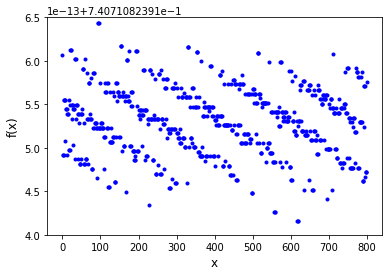

In [51]:
y_a = [f_a(x) for x in X]

plot_ejercicio_1(i,y_a,.7407108239094,.74071082390965)

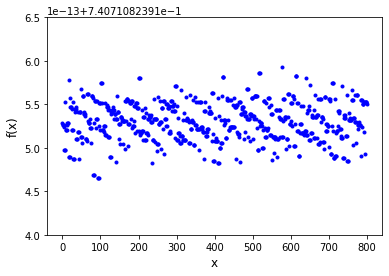

In [52]:
y_b = [f_b(x) for x in X]

plot_ejercicio_1(i,y_b,.7407108239094,.74071082390965)

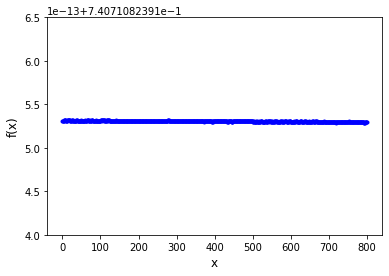

In [53]:
y_c = [f_c(x) for x in X]

plot_ejercicio_1(i,y_c,.7407108239094,.74071082390965)

<div class="qst">
    
¿Qué cambio has observado? ¿Podrías explicar por qué ha cambiado la dirección del patrón?
    
</div>

Para estos valores de $x$, el patrón es similar pero la dirección del mismo ha cambiado: la pendiente de las bandas es negativa. El error absoluto de una función es proporcional a la derivada de la misma y una posible explicación para el fenómeno observado es que estamos evaluando la función utilizando valores cercanos a un mínimo ($x\approx2.4$) y por eso la pendiente es negativa y cercana a 0. Por el contrario, en el ejercicio anterior estábamos evaluando la función utilizando valores cercanos a un máximo ($x\approx1.606$).



# Apartado 2. Aproximación de funciones

## Cuestiones teóricas

<div class="qst"> 
Dado un conjunto de n puntos, existe siempre un polinomio de grado $m < n-1$ que pase por dichos puntos?    
</div>

No. Si tomamos 3 puntos no alineados ($n=3$), no existe niguna recta ($m<2$) que interporle dichos puntos.

<div class="qst"> 
¿Se te ocurre una manera en la cual el cálculo de los valores singulares de una matriz permita calcular un polinomio de regresión adecuado?  
</div>

La matriz $A$ del polinomio de regresión $Aw=y$ puede descomponerse en valores singulares $A=USV$, de modo que $USVw=Y$. Operando sobre el sistema podríamos encontrar $w$ en términos de de los valores singulares. 

<div class="qst"> 
    
* ¿Como podrías transformar el problema de encontrar un polinomio de regresión en un problema de producto de matrices?
* ¿Crees que, además, es posible calcular el error de regresión a partir de los valores singulares?

</div>
No se nos ocurre cómo.


### Apartado 1

En este apartado se busca encontrar un polinomio $P_2(x)=a_0 + a_1x + a_2x^2$, que pasa por los puntos $x_i=\{0.0, 0.25, 0.5, 0.75, 1.0\}$ e $y_i=\{1, 1.2840, 1.6487, 2.1170, 2.7183\}$, utilizando un problema de interpolación sobredimensionado

Para ello se asume que el $P_2(x)$ pasa por todos los puntos $x_i,y_i$ y se reescribe el problema de la forma $Xa=y$, siendo $X$ matriz $5x3$, $a$ un vector $3x1$ e $y$ un vector $5x1$.




In [60]:
# Declaramos X e y, siendo X la matriz de Vandermonde
x = np.array([0.0, 0.25, 0.5, 0.75, 1.0])
y = np.array([1, 1.2840, 1.6487, 2.1170, 2.7183]).reshape(5,1)
X = np.vander(x, N=3, increasing=True)
# Visualizamos la matriz de Vandermonde calculada
print(X)

[[1.     0.     0.    ]
 [1.     0.25   0.0625]
 [1.     0.5    0.25  ]
 [1.     0.75   0.5625]
 [1.     1.     1.    ]]


In [62]:
# Descomponemos X en valores singulares y representamos la salida de numpy
U, s, V = np.linalg.svd(X, full_matrices=True)
print('U:\n',U)
print('S:\n',s)
print('V:\n',V)

U:
 [[-0.29454913  0.63267484  0.63140925 -0.02576091 -0.33707876]
 [-0.346616    0.45500901 -0.21036331  0.28091869  0.74138797]
 [-0.41593037  0.19422733 -0.52439676 -0.68819061 -0.20169135]
 [-0.50249224 -0.14967019 -0.3106911   0.63666879 -0.47246617]
 [-0.60630161 -0.57668356  0.43075367 -0.20363596  0.26984831]]
S:
 [2.71168512 0.93707467 0.16268803]
V:
 [[-0.7987245  -0.4712162  -0.37415833]
 [ 0.59286357 -0.51017309 -0.62308604]
 [ 0.10272272 -0.71949893  0.68685467]]


In [63]:
# Transformamos s en la matriz S real de dimensión 5x3
S = np.zeros((5,3))
np.fill_diagonal(S, s)
print('S:\n',S)

S:
 [[2.71168512 0.         0.        ]
 [0.         0.93707467 0.        ]
 [0.         0.         0.16268803]
 [0.         0.         0.        ]
 [0.         0.         0.        ]]


In [64]:
# Operamos sobre U
C = U.T@y
c = C[:3].reshape(3,1)
z = (c.T/s).reshape(3,1)
print('c:\n', c)
print('z:\n', z)

c:
 [[-4.1372342 ]
 [-0.3473217 ]
 [ 0.00991447]]
z:
 [[-1.52570598]
 [-0.37064463]
 [ 0.06094163]]


### Apartado 2

En este apartado se calcula $a$ como el producto $V^*z$.

In [25]:
a = V.T@z
print(a)

[[1.00513714]
 [0.86418286]
 [0.84365714]]


### Apartado 3

En este apartado se calcula el error cometido con la regresión obtenida $\sqrt{c_4^2 + c_2^2}$ y se compara con el error manual $\sqrt{\sum_{i}P_2(x_i)-y_i}$.

In [104]:
e_svd = np.linalg.norm(C[3:])
e_manual = np.linalg.norm(X@a-y)

print('Error utilizando valores singulares =',e_svd)
print('Error manual =',e_manual)

print('Diferencia absoluta de ambos = ',np.abs(e_svd-e_manual))


Error utilizando valores singulares = 0.016556949339433427
Error manual = 0.01655694933943349
Diferencia absoluta de ambos =  6.245004513516506e-17


## Ejercicio Opcional

<div class="qst"> 
¿Qué obtenemos cuando aplicamos el método de los apartados 1 y 2 a la construcción
de un polinomio de grado 4?</div>

Definimos una función que utilice el método para encontrar $a$, el error de regresión y los valores de $y$ cuando se busca un polínomio de grado $m$ que pase por $x_i,y_i$ puntos.


In [105]:
def svd_regression_a_e(x,y,degree):
    n = degree + 1
    m = x.shape[0]
    X = np.vander(x, N=n, increasing=True)
    U, s, V = np.linalg.svd(X, full_matrices=True)
    S = np.zeros((m,n))
    np.fill_diagonal(S, s)
    C = U.T@y
    c = C[:n].reshape(n,1)
    z = (c.T/s).reshape(n,1)
    a = V.T@z
    e = np.linalg.norm(c[n:])
    return a,e


def svd_regression_y(x,a):
    n = a.shape[0]
    X = np.vander(x, N=n, increasing=True)
    return X@a

Error de regresión = 0.0


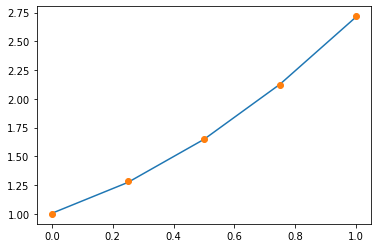

In [108]:
a_4,e_4 = svd_regression_a_e(x,y,4)
y_4 = svd_regression_y(x,a)

print('Error de regresión =', e_4)




<div class="qst"> 
Comprueba que, efectivamente el polinomio obtenido se corresponde en este caso a
un polinomio de interpolación en lugar de a un polinomio de regresión.</div>

Al utilizar un polinomio de grado 4, la matriz $X$ de vandermor es de $5x5$. Como los puntos $\{x_0,...,x_5\}$ elegidos no están alineados dos a dos, $Xa=y$ es un sistema determinado de 5 ecuaciones con 5 incognitas. Por tanto, X es invertible y podemos resolver el sistema utilizando $a=X^{-1}y$. Así, el polinomio resultante $p(x) = a_0 + a_1x + a_2x^2 + a_3x^3 + a_4x^4$ pasa por los puntos $x_0,...,x_5$